In [80]:
!unzip mnist.zip

Archive:  mnist.zip
replace mnist/test/0/10.png? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [94]:
#Definimos una funcion para elegir un porcentaje dado de los datos aleatoriamenet
def funcion(X1,N2,Y1,porcentaje):
  a=range(N2)
  b=sample(a,int(N2*(porcentaje/100)))

  X2=[]
  Y2=[]
  for i in b:
    X2.append(X1[int(i)])
    Y2.append(Y1[int(i)])  

  return X2,Y2

In [82]:
import numpy as np
import matplotlib.pyplot as plt

from glob import glob
#Definimos una funcion global y se realiza todo el cambio a tensor, entrenamiento de la red, definicion del modelo y por ultimo las pruebas

def funcionGlobal(porcentaje):
  train_files = glob('./mnist/train/*/*.png')
  valid_files = glob('./mnist/valid/*/*.png')



  np .random.shuffle(train_files)
  np.random.shuffle(valid_files)


  from PIL import Image

  N_train = len(train_files)
  X_train = []
  Y_train = []


  for i, train_file in enumerate(train_files):
    Y_train.append( int(train_file.split('/')[3]) )
    X_train.append(np.array(Image.open(train_file)))

  N_valid = len(valid_files)
  X_valid = []
  Y_valid = []

  for i, valid_file in enumerate(valid_files):
    Y_valid.append( int(valid_file.split('/')[3]) )
    X_valid.append( np.array(Image.open(valid_file)) )




  import torch
  from torch.autograd import Variable
  from random import sample

  X_train,Y_train= funcion(X_train,N_train,Y_train,porcentaje)

  print(len(X_train))

  X_train = Variable(torch.from_numpy(np.array(X_train))).float()
  Y_train = Variable(torch.from_numpy(np.array(Y_train))).long()

  X_valid = Variable(torch.from_numpy(np.array(X_valid))).float()
  Y_valid = Variable(torch.from_numpy(np.array(Y_valid))).long()



  X_train.data.size()

#--- Definimos una ANN con dos capas ocultas lineales de 100 neuronas

  input_dim = 28*28
  out_dim = 10
  hidden = 50

  model = torch.nn.Sequential(
    torch.nn.Linear(input_dim, hidden),
    torch.nn.ReLU(),       
    torch.nn.Linear(hidden, hidden),
    torch.nn.ReLU(),       
    torch.nn.Linear(hidden, out_dim)
  )

  optimizer = torch.optim.Adam(model.parameters())
  criterion = torch.nn.CrossEntropyLoss()

  from sklearn.metrics import f1_score # Nueva métrica (La revisaremos la próóxima sesión)

#-- Número de épocas
  n_epoch = 100

#-- Listas de evaluación entrenamiento
  loss_train = []
  f1_train = []
  acc_train = []

#-- Listas de evaluación validación
  loss_valid = []
  f1_valid = []
  acc_valid = []

#-- Entrenamineto de la ANN
  for epoch in range(n_epoch):
    model.train()
  
    Xtr = X_train.view(X_train.size(0), -1)
    Y_pred = model(Xtr)

    loss = criterion(Y_pred,Y_train)
    loss_train.append(loss.item())

    Y_pred = torch.argmax(Y_pred, 1)
    f1_train.append( f1_score(Y_train,Y_pred, average='macro') )
  
    acc = sum(Y_train == Y_pred)/len(Y_pred)
    acc_train.append(acc)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    if(epoch==n_epoch-1):
      print( 'Epoch [{}/{}], loss: {}. f1:{} acc: {} '.format(epoch+1,n_epoch,loss_train[-1], f1_train[-1], acc_train[-1]) )

    model.eval()
    Xvl = X_valid.view(X_valid.size(0), -1)
    Y_pred = model(Xvl)  
    loss = criterion(Y_pred,Y_valid)
    loss_valid.append(loss.item())

    Y_pred = torch.argmax(Y_pred, 1)
    f1_valid.append( f1_score(Y_valid, Y_pred, average='macro') )

    acc = sum(Y_valid == Y_pred)/len(Y_pred)
    acc_valid.append(acc)
  fig = plt.figure(figsize=(15,5))
  plt.subplot(1,3,1)
  plt.plot(range(n_epoch), loss_train, label='train')
  plt.plot(range(n_epoch), loss_valid, label='valid')
  plt.xlabel('n_epoch')
  plt.ylabel('loss')
  plt.legend()
  plt.grid()
  plt.subplot(1,3,2)
  plt.plot(range(n_epoch), f1_train, label='train')
  plt.plot(range(n_epoch), f1_valid, label='valid')
  plt.xlabel('n_epoch')
  plt.ylabel('f1_score')
  plt.legend()
  plt.grid()
  plt.subplot(1,3,3)
  plt.plot(range(n_epoch), acc_train, label='train')
  plt.plot(range(n_epoch), acc_valid, label='valid')
  plt.xlabel('n_epoch')
  plt.ylabel('accuracy')
  plt.legend()
  plt.grid()

  plt.show()

600
Epoch [100/100], loss: 0.005137070547789335. f1:1.0 acc: 1.0 


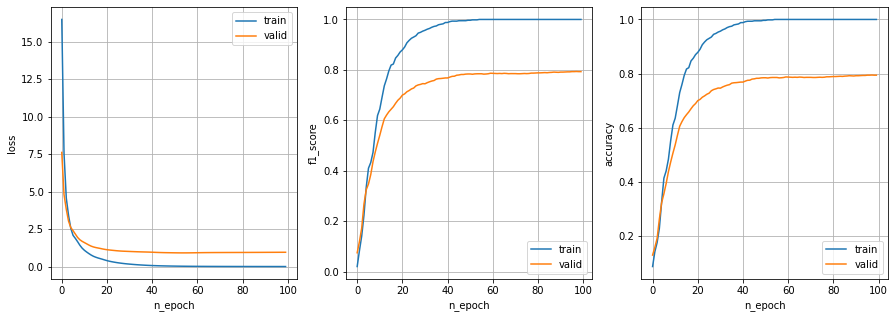

In [83]:
#Con el 10% de los datos de entrenamiento 
funcionGlobal(10)

1200
Epoch [100/100], loss: 0.01254836842417717. f1:1.0 acc: 1.0 


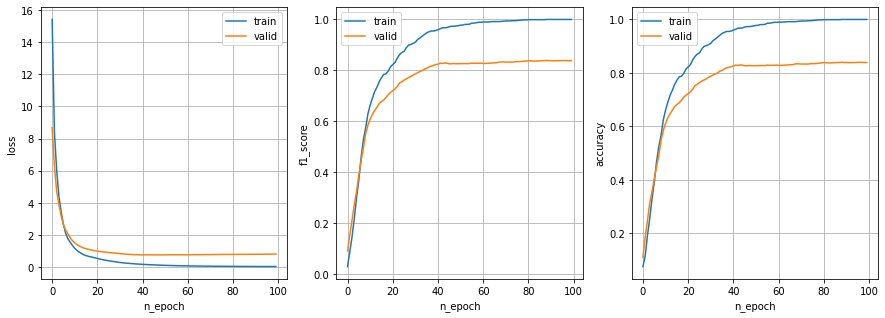

In [84]:
#Con el 20% de los datos de entrenamiento 
funcionGlobal(20)

3000
Epoch [100/100], loss: 0.03306831791996956. f1:0.9956822869216853 acc: 0.9956666827201843 


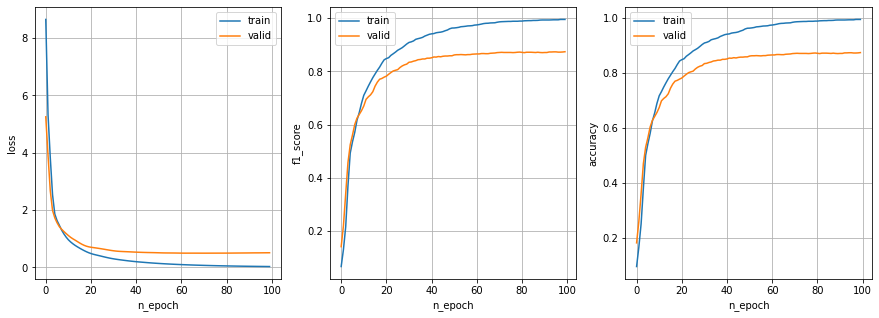

In [85]:
#Con el 50% de los datos de entrenamiento 
funcionGlobal(50)

4800
Epoch [100/100], loss: 0.1469651609659195. f1:0.9611408223752868 acc: 0.9610416889190674 


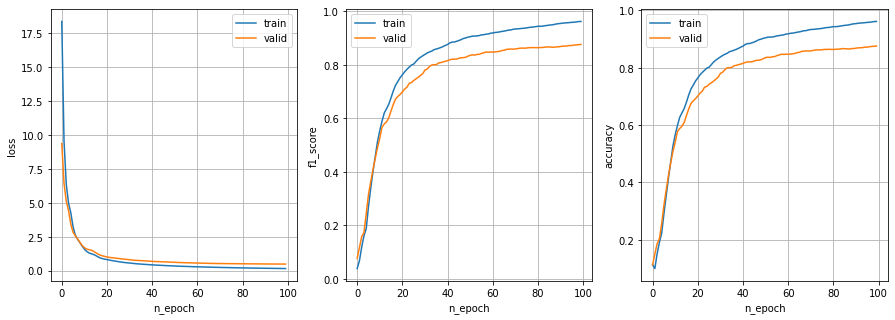

In [86]:
#Con el 80% de los datos de entrenamiento 
funcionGlobal(80)

6000
Epoch [100/100], loss: 0.1476312130689621. f1:0.9588227870341839 acc: 0.9588333368301392 


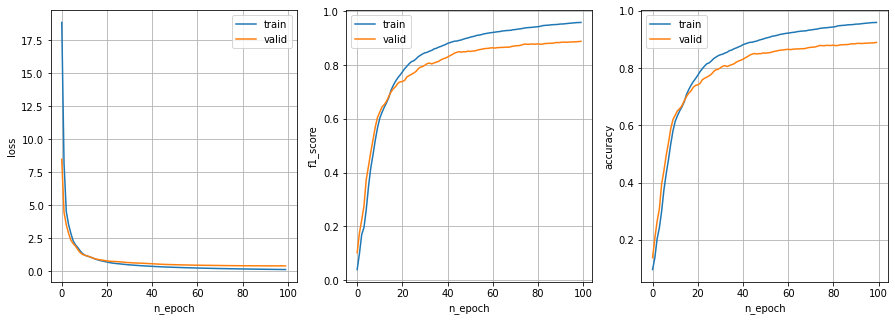

In [87]:
#Con el 100% de los datos de entrenamiento 
funcionGlobal(100)

i) Como se puede observar a medida que se aumenta el tamaño de entrenamiento se logra apreciar que la perdida aumenta y las otras medidas disminuyen pero para los datos de entrenamiento pero mientras que para validacion son menores.Estos scores para entrenamiento son menores porque se deben adaptar a menos datos pero no va a funcionar cuando queramos meter nuevos datos porque no tiene la informacion suficiente.

ii) La importancia en el tamaño se puede ver reflejada en las graficas que a medida que aumenta el tamaño, la curva del entrenamiento y validacion se va acercando. Además las dos curvas se pueden observar que tienen el mismo comportamiento aproximadamente. Tambien, se puede observar que la validacion aumenta cada vez que aumenta los datos de entrenamiento.

iii) Al final,Aunque usemos un conjunto de tamaño menor de entrenamiento y los scores(de entrenamiento) sean mejores, es importante usar mayor tamaño en el conjunto de entramiento para que la red neuronal pueda aprender las caracteristicas mas generales y con esto logre mayores scores en la vallidacion.

#Punto Dos


In [88]:
#Se hace una funcion para automatizar el testeo del modelo que se deja como el ultimo cargado(100%)
def funcionSegunda(porcentaje):
  test_files = glob('./mnist/test/*/*.png')
  np.random.shuffle(test_files)
  N_test = len(test_files)
  X_test = []
  Y_test = []

  for i, test_file in enumerate(test_files):
    Y_test.append( int(test_file.split('/')[3]) )
    X_test.append( np.array(Image.open(test_file)) )

  X_test,Y_test=funcion(X_test,N_test,Y_test,porcentaje)
  X_test = Variable(torch.from_numpy(np.array(X_test))).float()
  Y_test = Variable(torch.from_numpy(np.array(Y_test))).long()

  model.eval()

  Xts = X_test.view(X_test.size(0), -1)
  Y_pred = model(Xts)  
  loss = criterion(Y_pred,Y_test)

  Y_pred = torch.argmax(Y_pred, 1)
  f1 = f1_score(Y_test, Y_pred, average='macro')

  acc = sum(Y_test == Y_pred)/len(Y_pred)

  print('loss: {}, f1: {}, acc: {}'.format(loss.item(), f1, acc))

In [111]:
  #Los 3 scores para un conjunto de entrenamiento al 10%
funcionSegunda(10)

loss: 0.8985398411750793, f1: 0.8131328320802005, acc: 0.8282828330993652


In [112]:
#Los 3 scores para un conjunto de entrenamiento al 20%
funcionSegunda(20)

loss: 0.7527673840522766, f1: 0.8275978209524004, acc: 0.8434343338012695


In [105]:
#Los 3 scores para un conjunto de entrenamiento al 50%
funcionSegunda(50)

loss: 0.9020903706550598, f1: 0.8269398742928417, acc: 0.8266128897666931


In [106]:
#Los 3 scores para un conjunto de entrenamiento al 80%
funcionSegunda(80)

loss: 0.9348873496055603, f1: 0.8261641377579562, acc: 0.8335434794425964


In [107]:
#Los 3 scores para un conjunto de entrenamiento al 100%
funcionSegunda(100)

loss: 0.9211150407791138, f1: 0.8274572574665671, acc: 0.8296371102333069


i) El tamaño del conjunto de testeo importa para tener unos scores fijos. Porque si tenemos un porcentaje menor del tamaño del conjunto de testeo puede tomar los datos que favorecen al modelo y tener mejores scores o los datos que no favorecen y tener peores scores. Por eso, la importancia en el tamaño es para lograr estabilizar los scores y que no varien demasiado.

ii)Para los diferentes tamaños no encontramos a simple vista una relacion lineal entre ellos, sino que estos siempre estan alrededor de los scores para el 100%. 

iii) Como ultimo, es importante tener una gran diversidad en el grupo de testeo para tener un score fijo. Además, es importante tomar el 100% del tamaño del conjunto de testeo para que todos los datos de testeo sirvan para estabilizar.